### Dataset Information:-

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Gender: Feature, Categorical, "Gender"<br><br>
Age : Feature, Continuous, "Age"<br><br>
Height: Feature, Continuous<br><br>
Weight: Feature Continuous<br><br>
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "<br><br>
FAVC : Feature, Binary, " Do you eat high caloric food frequently? "<br><br>
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "<br><br>
NCP : Feature, Continuous, " How many main meals do you have daily? "<br><br>
CAEC : Feature, Categorical, " Do you eat any food between meals? "<br><br>
SMOKE : Feature, Binary, " Do you smoke? "<br><br>
CH2O: Feature, Continuous, " How much water do you drink daily? "<br><br>
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "<br><br>
FAF: Feature, Continuous, " How often do you have physical activity? "<br><br>
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "<br><br>
CALC : Feature, Categorical, " How often do you drink alcohol? "<br><br>
MTRANS : Feature, Categorical, " Which transportation do you usually use? "<br><br>
NObeyesdad : Target, Categorical, "Obesity level" <br><br>

# Importing libraries and Reading data

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

warnings.simplefilter(action="ignore")
sns.set_style("darkgrid")

In [5]:
csv_path  = os.path.join("..", "data", "ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
data = pd.read_csv(csv_path)

In [7]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# Data wrangling

In [9]:
data.duplicated().sum()

24

In [11]:
data.loc[data.duplicated(keep=False), :]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
208,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


* There is no way to find out if these are duplicated entries or not so we keep them

In [12]:
data = data.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transportion"})

In [13]:
for col in ['Age', 'Weight', 'vegetable_eat_daily','number_of_meals_daily', 'water_drinking_daily','physical_activity_daily','electronics_usage_daily']:
    data[col] = data.loc[:,col].round().astype(int)

In [14]:
data.head()

,Age,Gender,Height,Weight,alcohol_drinking_frequency,high_calorie_food_eat,vegetable_eat_daily,number_of_meals_daily,calories_monitoring,SMOKE,water_drinking_daily,family_history_with_overweight,physical_activity_daily,electronics_usage_daily,food_between_meals,method_of_transportion,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.80,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.80,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,90,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
data.describe()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586452,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.190136,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.500000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Univariate analysis

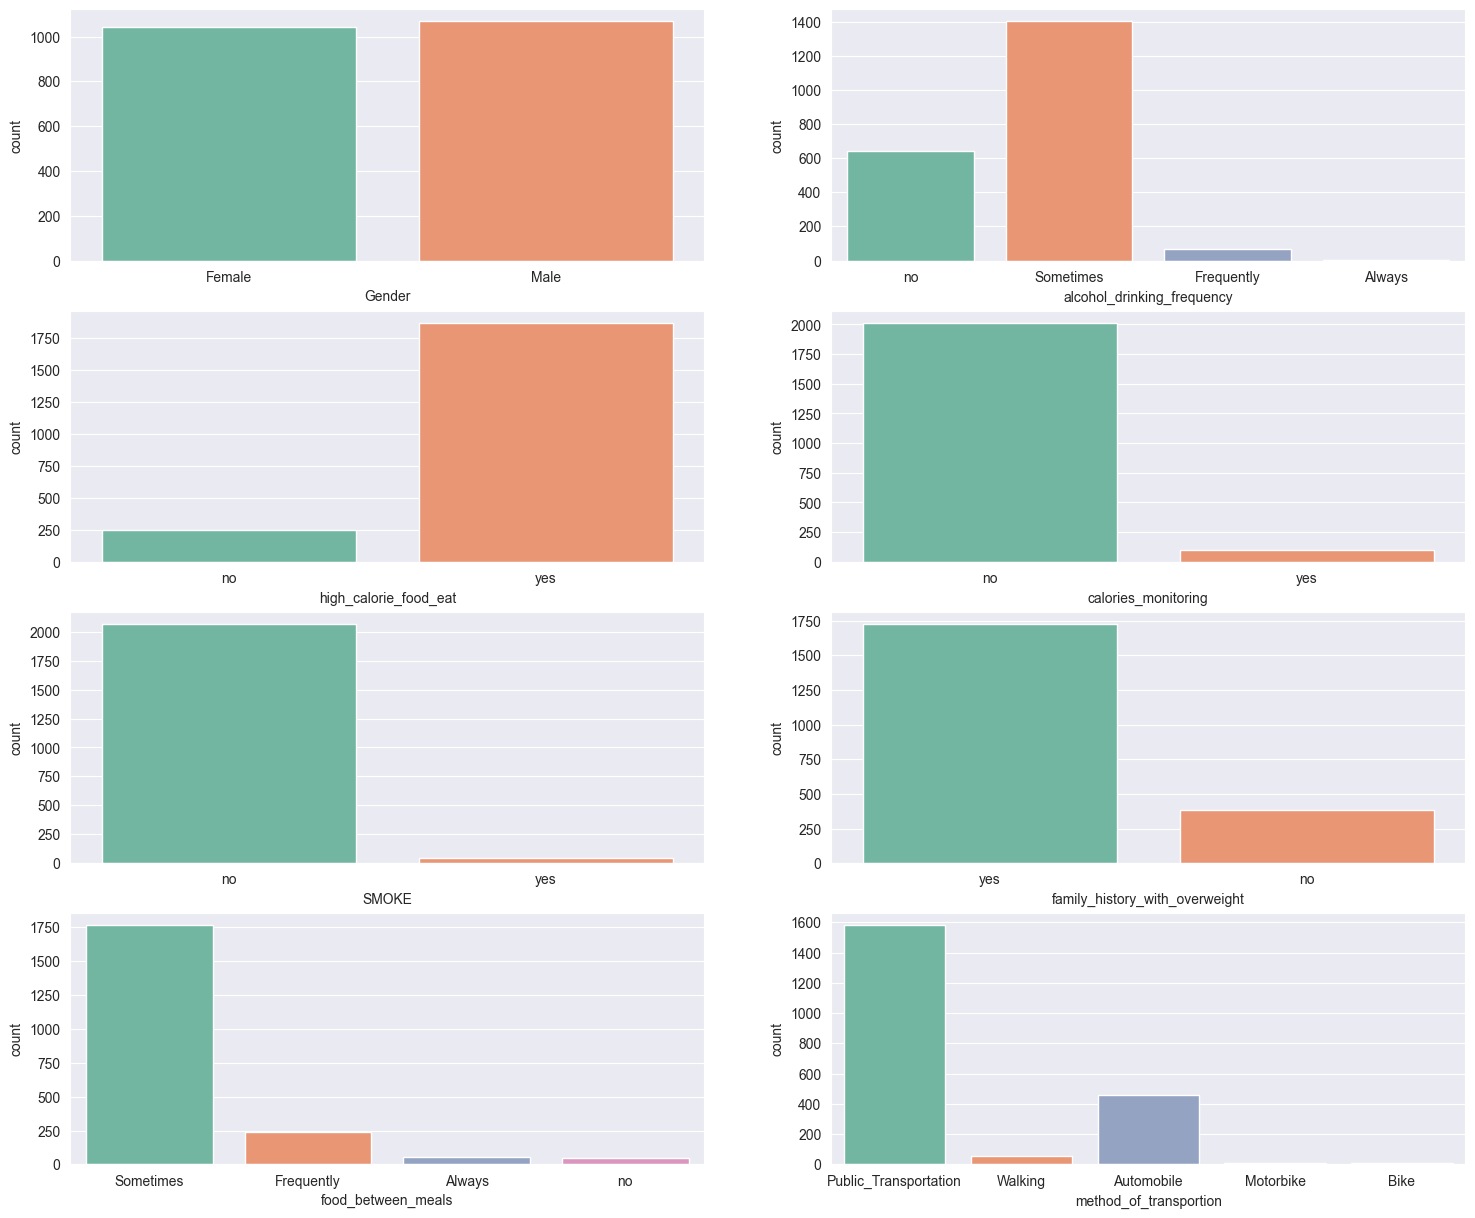

In [192]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col,palette=sns.color_palette("Set2"))

<Axes: xlabel='NObeyesdad'>

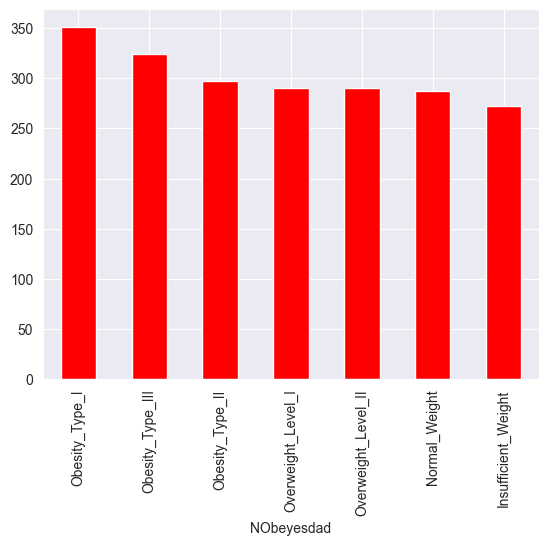

In [193]:
data["NObeyesdad"].value_counts().sort_values(ascending=False).plot(kind="bar",color="red")

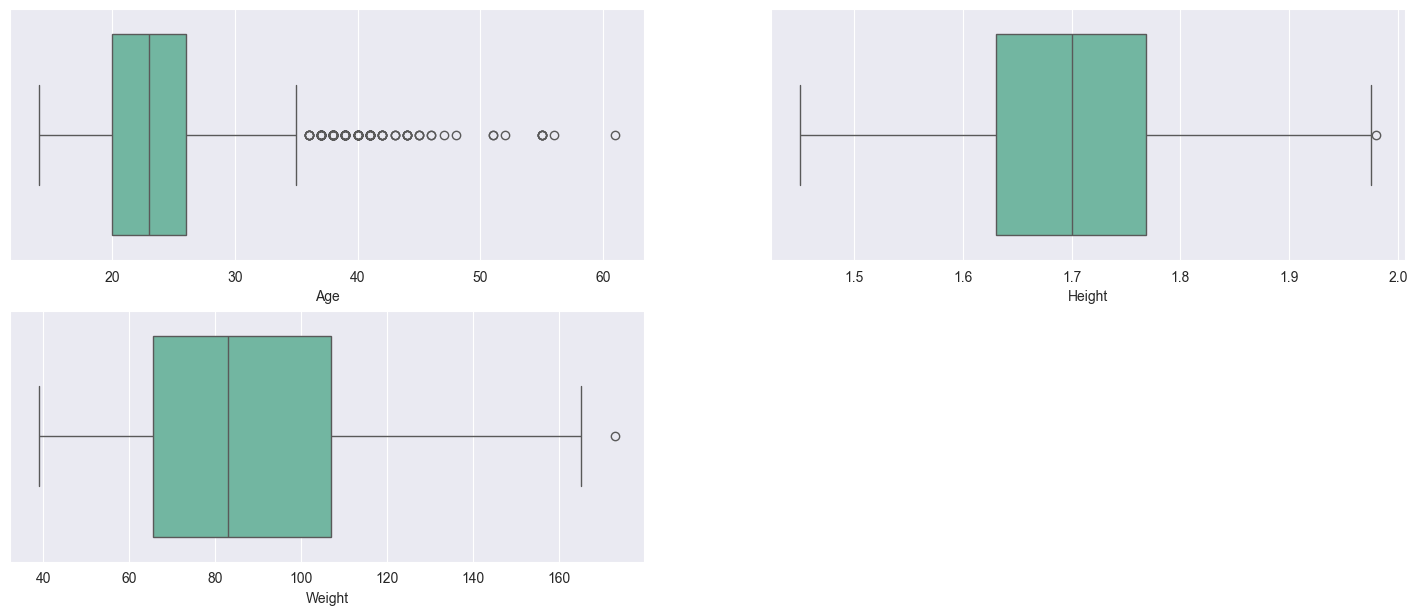

In [195]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="number").columns[:3]):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=data,x=col,palette=sns.color_palette("Set2"))

* We can see there is alot of outliers in age column we can reduce that

In [17]:
data=data[np.abs(stats.zscore(data["Age"])) < 2].reset_index(drop=True)

<Axes: xlabel='Age'>

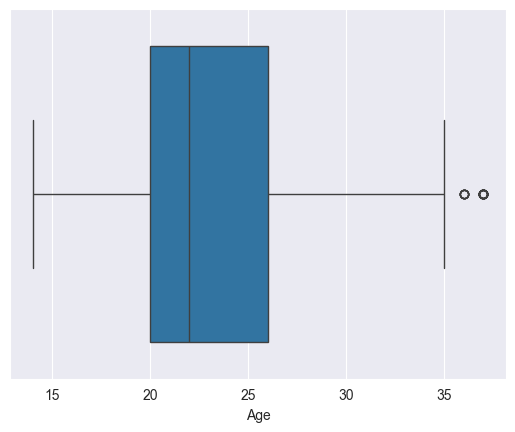

In [197]:
sns.boxplot(data=data,x="Age")

In [198]:
data.shape

(1981, 17)

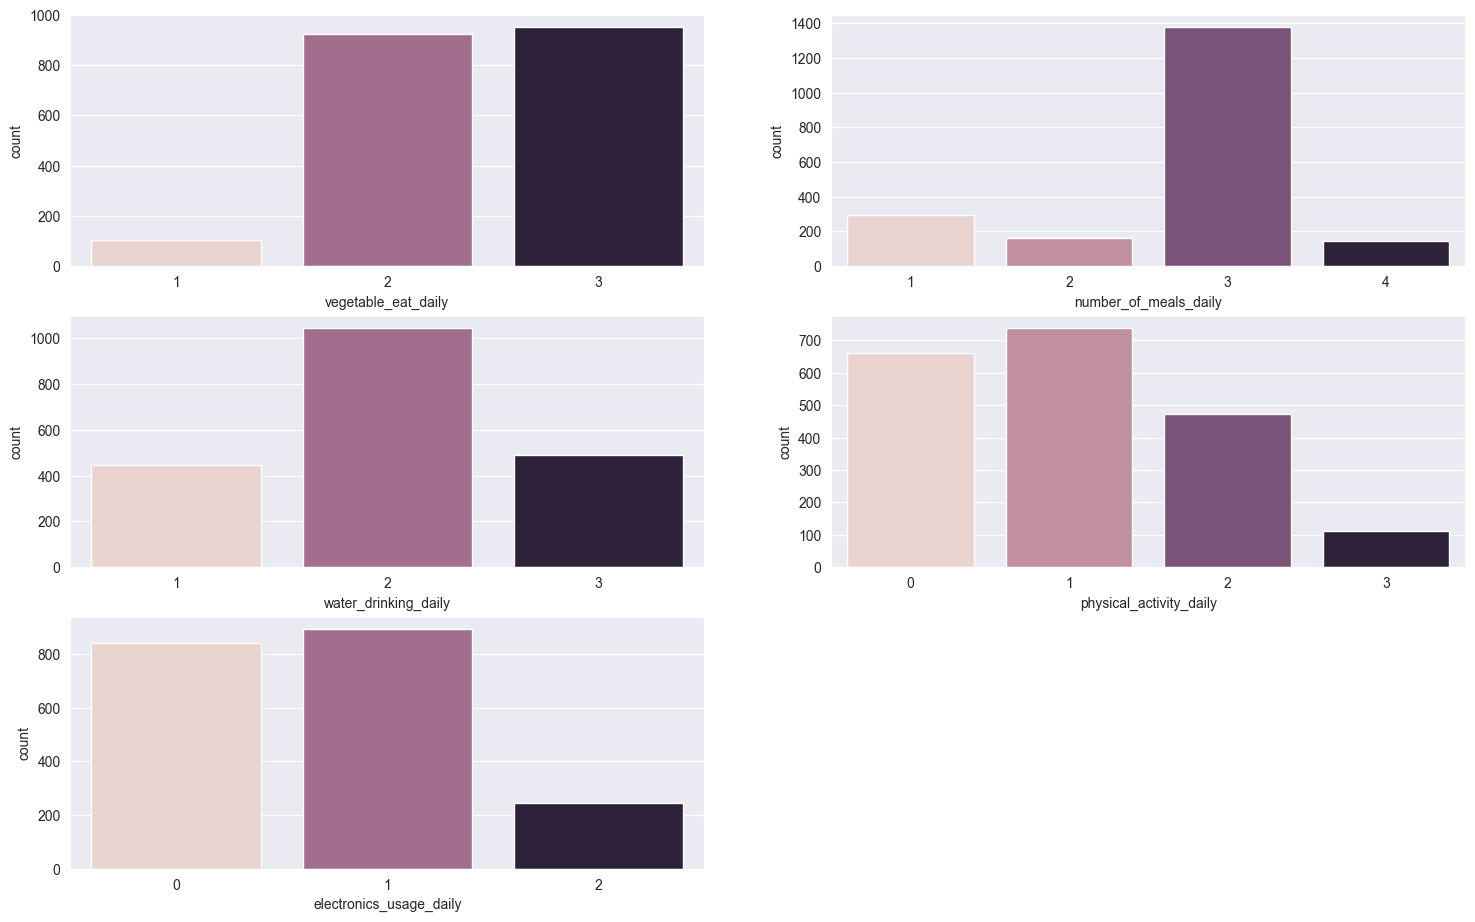

In [199]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="number").columns[3:]):
    plt.subplot(4,2,i+1)
    #sns.histplot(data=data,x=col,kde=True,bins=20,color="cyan")
    sns.countplot(data=data,x=col,hue=col,legend=False)

In [200]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'alcohol_drinking_frequency',
       'high_calorie_food_eat', 'vegetable_eat_daily', 'number_of_meals_daily',
       'calories_monitoring', 'SMOKE', 'water_drinking_daily',
       'family_history_with_overweight', 'physical_activity_daily',
       'electronics_usage_daily', 'food_between_meals',
       'method_of_transportion', 'NObeyesdad'],
      dtype='object')

## How is obesity type affected by eating high calorie food?

In [201]:
data.groupby(['NObeyesdad', 'high_calorie_food_eat'])["high_calorie_food_eat"].count()

NObeyesdad           high_calorie_food_eat
Insufficient_Weight  no                        51
                     yes                      220
Normal_Weight        no                        75
                     yes                      206
Obesity_Type_I       no                         9
                     yes                      284
Obesity_Type_II      no                         6
                     yes                      268
Obesity_Type_III     no                         1
                     yes                      323
Overweight_Level_I   no                        20
                     yes                      256
Overweight_Level_II  no                        71
                     yes                      191
Name: high_calorie_food_eat, dtype: int64

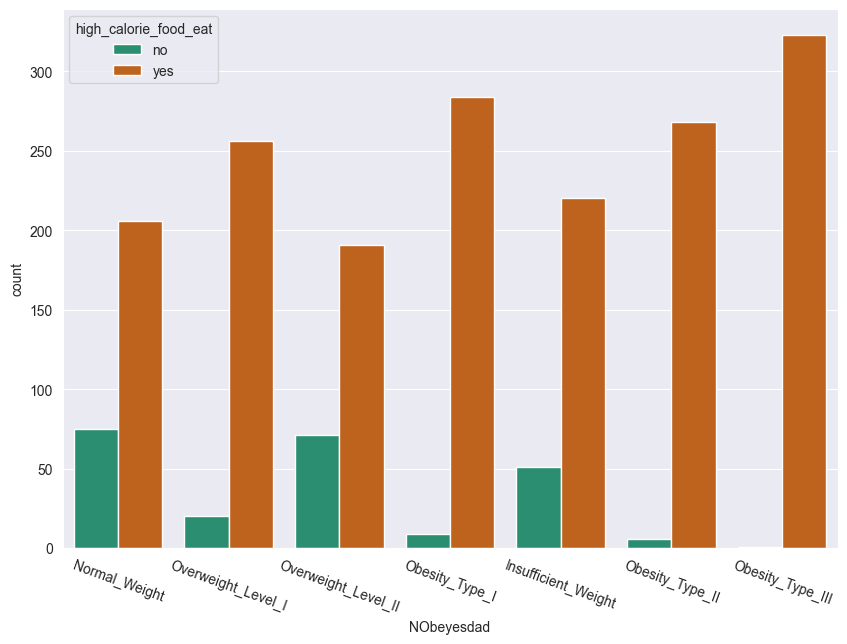

In [202]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x=data.NObeyesdad,hue=data.high_calorie_food_eat,palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

* high calorie food seems to not affect obesity type that much but it does affect whether someone is above normal weight or not
* obesity type 3 however seems to have no one not eating high calorie food acording to this data and type 2 is very high

## Average age of each obesity type

In [203]:
data.groupby("NObeyesdad")["Age"].median()

NObeyesdad
Insufficient_Weight    19.0
Normal_Weight          21.0
Obesity_Type_I         23.0
Obesity_Type_II        27.0
Obesity_Type_III       25.0
Overweight_Level_I     21.0
Overweight_Level_II    23.0
Name: Age, dtype: float64

Text(0.5, 1.0, 'Average age of each obesity type')

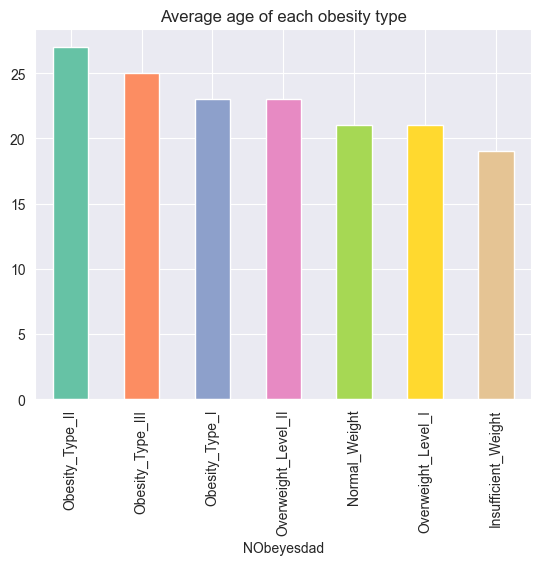

In [204]:
data.groupby("NObeyesdad")["Age"].median().sort_values(ascending=False).plot(kind="bar",color = sns.color_palette("Set2"))
plt.title("Average age of each obesity type")

* The avg age is the highest in obesity type 2 followed by 3 and 1
* The avg age is the lowest in insufficient weight 
* so it seems that as age increases weight increases

# Average weight of each obesity type

In [205]:
data.groupby("NObeyesdad")["Weight"].mean()

NObeyesdad
Insufficient_Weight     49.926199
Normal_Weight           62.106762
Obesity_Type_I          94.819113
Obesity_Type_II        115.306569
Obesity_Type_III       120.972222
Overweight_Level_I      74.510870
Overweight_Level_II     82.045802
Name: Weight, dtype: float64

<Axes: xlabel='NObeyesdad'>

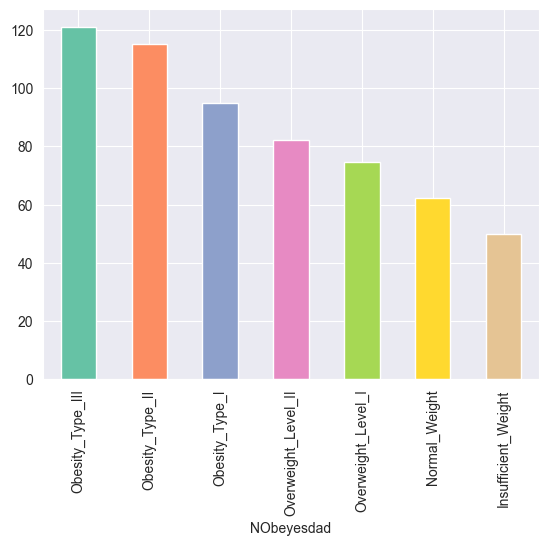

In [206]:
data.groupby("NObeyesdad")["Weight"].mean().sort_values(ascending=False).plot(kind="bar",color=sns.color_palette("Set2"))

* Here as expected obesity type 3 has the highest average weight followed by type 2 then type 1

## Does gender affect obesity type?

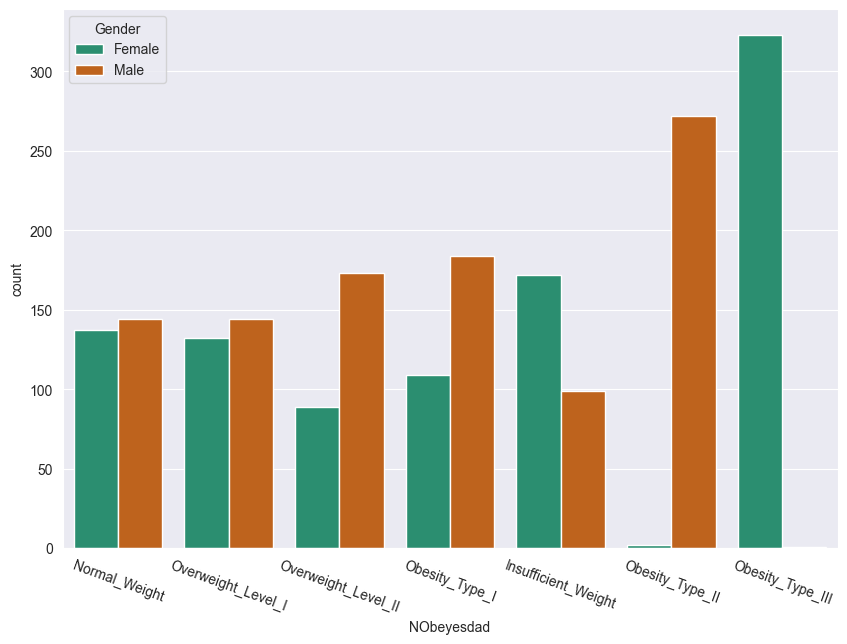

In [207]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="Gender",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

* Males are higher in almost all obesity types except obesity type 3
* Females are more likely to have insufficient weight
* Females are more likely to have severe obesity(type 3)

## Does eating food between meals affect obesity type?

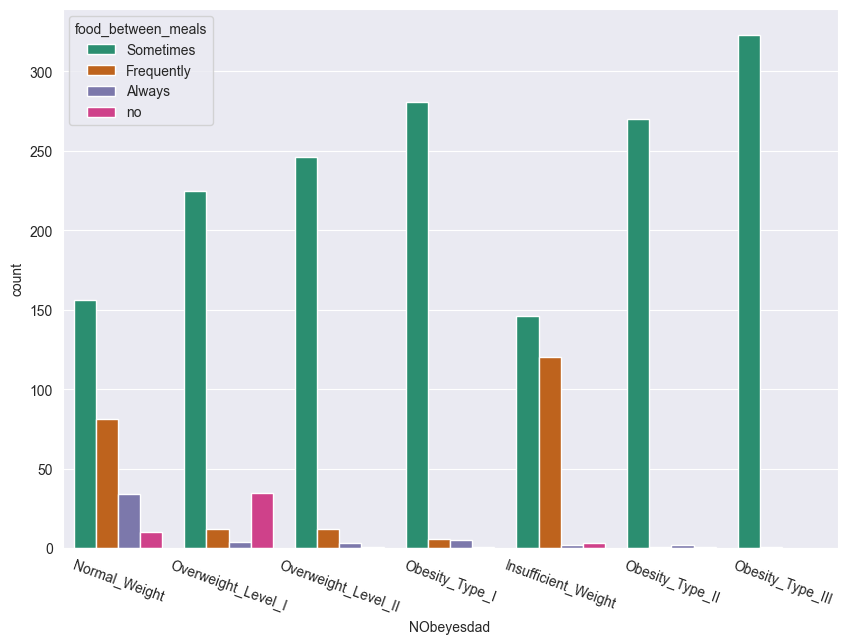

In [208]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="food_between_meals",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

## Does family history with overweight affect obesity type?

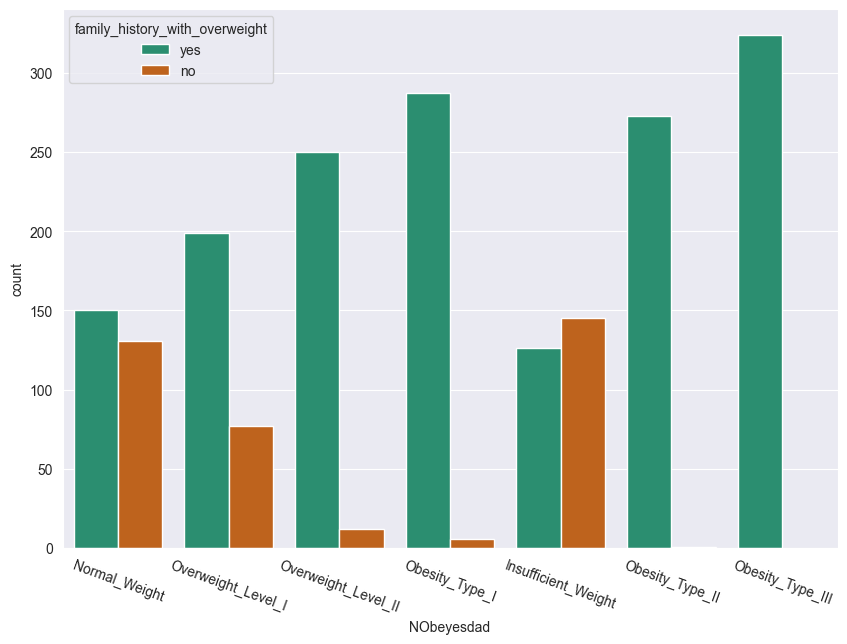

In [209]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="family_history_with_overweight",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

## Do people who drink also smoke?

<Axes: xlabel='alcohol_drinking_frequency', ylabel='count'>

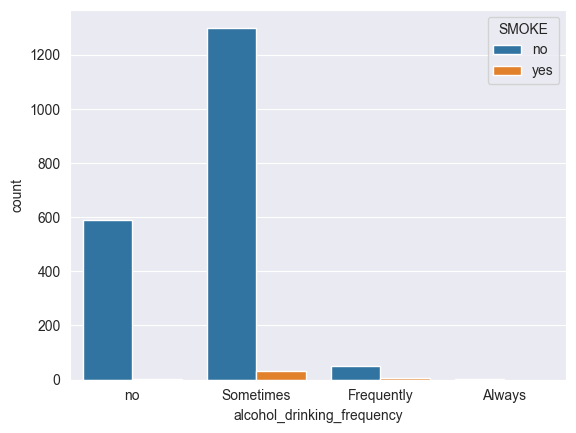

In [210]:
sns.countplot(data=data,x=data.alcohol_drinking_frequency,hue=data.SMOKE)

### saving cleaned data

In [29]:
cleaned_data_path = os.path.join("..", "data", "obesity_clean.csv")
data.to_csv(cleaned_data_path, index=False)

# Data preprocessing and splitting data

In [212]:
lgbm_settings = {'n_estimators': 137,
 'num_leaves': 16,
 'min_child_samples': 2,
 'learning_rate': 0.11333885880532285,
 'colsample_bytree': 0.7557376218643025,
 'reg_alpha': 0.0013323317789643257,
 'reg_lambda': 0.0018596588413880056,
 'n_jobs': -1,
 'max_bin': 511,
 'verbose': -1}

In [213]:
data.select_dtypes(include="object").columns

Index(['Gender', 'alcohol_drinking_frequency', 'high_calorie_food_eat',
       'calories_monitoring', 'SMOKE', 'family_history_with_overweight',
       'food_between_meals', 'method_of_transportion', 'NObeyesdad'],
      dtype='object')

## Enoding ordinal features using label enoder

In [25]:
encoder  =LabelEncoder()
model_data = data.copy()
for col in ['alcohol_drinking_frequency','food_between_meals','NObeyesdad']:
    model_data[col] =encoder.fit_transform(model_data[col])

## Encoding nominal data using pd dummies

In [26]:
cols = model_data.select_dtypes(include="object").columns
dums = pd.get_dummies(model_data[cols],dtype=int)
model_data = pd.concat([model_data,dums],axis=1).drop(columns=cols)

In [24]:
model_data.head()

,Age,Height,Weight,alcohol_drinking_frequency,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily,food_between_meals,...,calories_monitoring_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,method_of_transportion_Automobile,method_of_transportion_Bike,method_of_transportion_Motorbike,method_of_transportion_Public_Transportation,method_of_transportion_Walking
0,21,1.62,64,3,2,3,2,0,1,2,...,0,1,0,0,1,0,0,0,1,0
1,21,1.52,56,2,3,3,3,3,0,2,...,1,0,1,0,1,0,0,0,1,0
2,23,1.80,77,1,2,3,2,2,1,2,...,0,1,0,0,1,0,0,0,1,0
3,27,1.80,87,1,3,3,2,2,0,2,...,0,1,0,1,0,0,0,0,0,1
4,22,1.78,90,2,2,1,2,0,0,2,...,0,1,0,1,0,0,0,0,1,0


In [28]:
model_data_path = os.path.join("..", "data", "model data.csv")
model_data.to_csv(model_data_path,index=False)

## Correlation between data atributes

In [218]:
corr_data =data.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])

<Axes: >

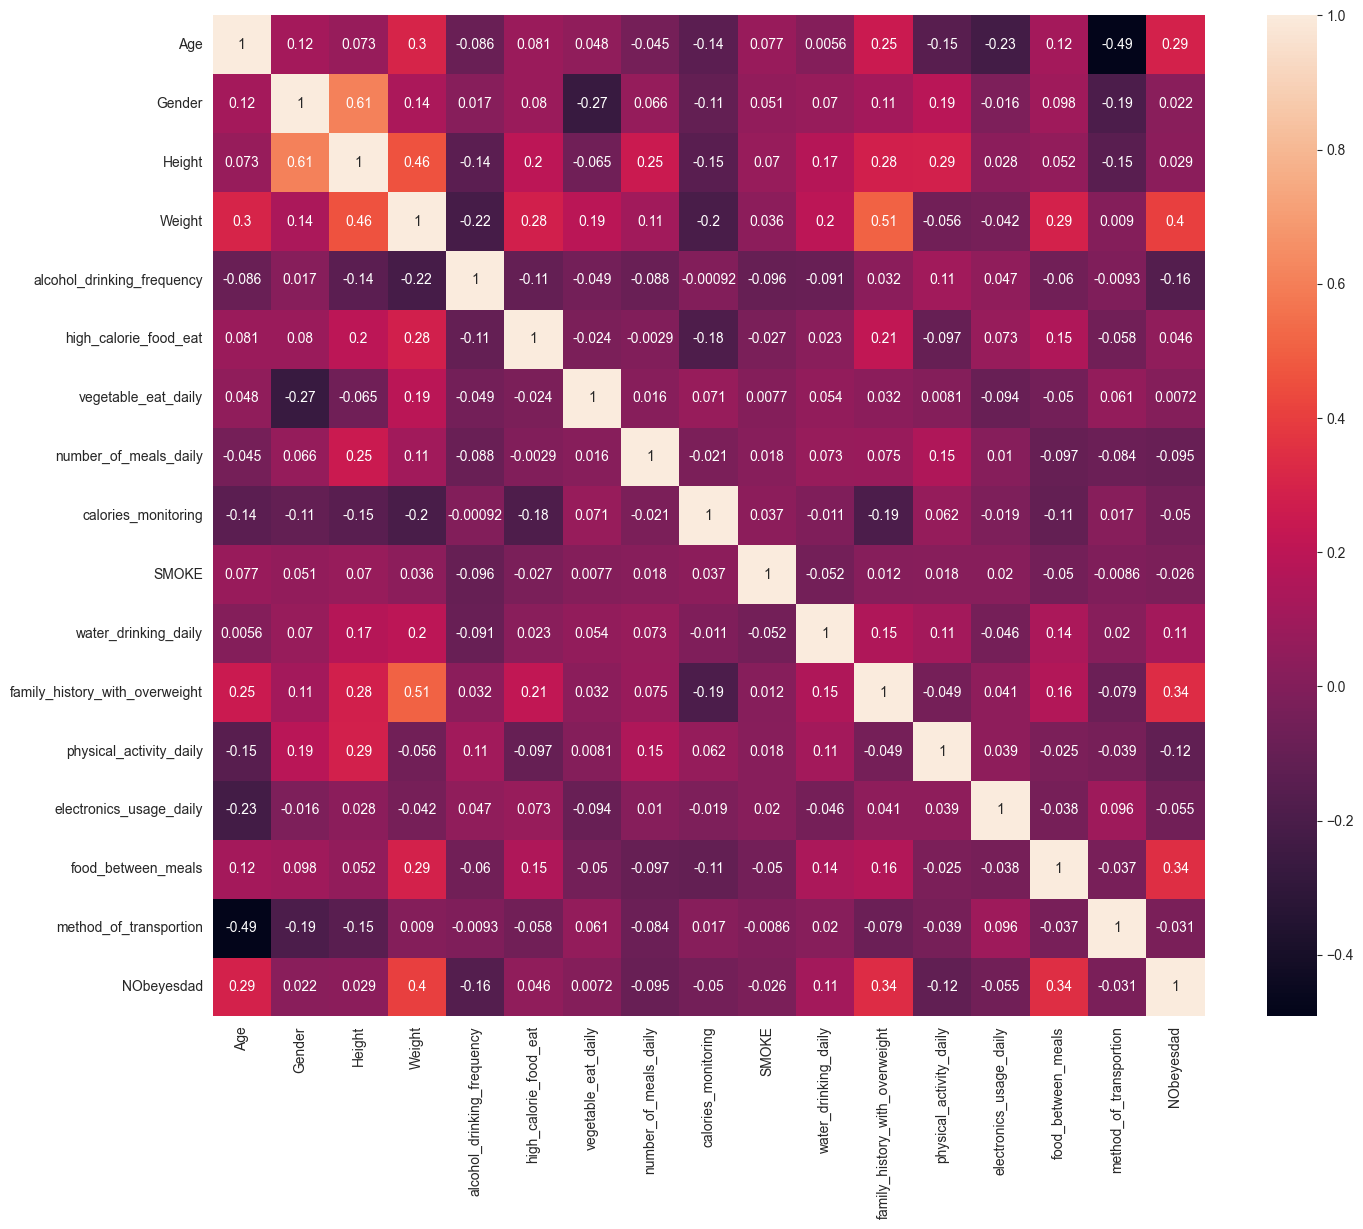

In [219]:
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)

## Normalizing data using max absolute scaler

In [220]:
x= model_data.drop(columns="NObeyesdad")
y=model_data["NObeyesdad"]
scaler_mas = MaxAbsScaler()
for col in x.columns[:-1]:
    scaler_mas.fit(x[[col]])
    x[col] = scaler_mas.transform (x[[col]])

## Splitting data and training models

In [221]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=7)

In [222]:
x

,Age,Height,Weight,alcohol_drinking_frequency,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily,food_between_meals,...,calories_monitoring_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,method_of_transportion_Automobile,method_of_transportion_Bike,method_of_transportion_Motorbike,method_of_transportion_Public_Transportation,method_of_transportion_Walking
0,0.567568,0.818182,0.369942,1.000000,0.666667,0.75,0.666667,0.000000,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.567568,0.767677,0.323699,0.666667,1.000000,0.75,1.000000,1.000000,0.0,0.666667,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,0.621622,0.909091,0.445087,0.333333,0.666667,0.75,0.666667,0.666667,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.729730,0.909091,0.502890,0.333333,1.000000,0.75,0.666667,0.666667,0.0,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.594595,0.898990,0.520231,0.666667,0.666667,0.25,0.666667,0.000000,0.0,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0.567568,0.864005,0.757225,0.666667,1.000000,0.75,0.666667,0.666667,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1977,0.594595,0.883123,0.774566,0.666667,1.000000,0.75,0.666667,0.333333,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1978,0.621622,0.884953,0.774566,0.666667,1.000000,0.75,0.666667,0.333333,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1979,0.648649,0.878510,0.768786,0.666667,1.000000,0.75,1.000000,0.333333,0.5,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [223]:
model_lgbm  = LGBMClassifier(**lgbm_settings)
model_xgb = XGBClassifier(objective="multi:softmax",num_class = 7)
model_gb = GradientBoostingClassifier(max_depth=9,min_samples_leaf=3,min_samples_split=13,subsample=0.751)
model_rfc = RandomForestClassifier()
models = [model_lgbm,model_xgb,model_gb,model_rfc]

In [224]:
for model in models:
    model.fit(x_train,y_train)

# Evaluating models

In [225]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on train data: {model.score(x_train,y_train)}")

score for LGBMClassifier on train data: 1.0
score for XGBClassifier on train data: 1.0
score for GradientBoostingClassifier on train data: 1.0
score for RandomForestClassifier on train data: 1.0


In [226]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on test data: {model.score(x_test,y_test)}")

score for LGBMClassifier on test data: 0.9899244332493703
score for XGBClassifier on test data: 0.982367758186398
score for GradientBoostingClassifier on test data: 0.9848866498740554
score for RandomForestClassifier on test data: 0.9420654911838791


In [227]:
print("scores of each model using kfold validation:-\n\n")
for model in models:
    score = cross_val_score(model,x,y,cv=10)
    avg = np.mean(score)
    model_name = type(model).__name__
    print(f"scores for {model_name}:{score}")
    print(f"average score for {model_name}:{avg}\n")

scores of each model using kfold validation:-


scores for LGBMClassifier:[0.93969849 0.93434343 0.98989899 0.96969697 0.98484848 0.99494949
 0.97474747 0.99494949 0.97474747 0.98484848]
average score for LGBMClassifier:0.9742728795492613

scores for XGBClassifier:[0.91457286 0.93434343 0.97474747 0.97979798 0.97474747 0.98989899
 0.97474747 0.98989899 0.97979798 0.97979798]
average score for XGBClassifier:0.9692350642099384

scores for GradientBoostingClassifier:[0.90954774 0.94949495 0.98484848 0.96969697 0.97979798 0.98989899
 0.98484848 0.99494949 0.97979798 0.97979798]
average score for GradientBoostingClassifier:0.9722679051824781

scores for RandomForestClassifier:[0.68341709 0.81313131 0.97474747 0.95959596 0.95959596 0.96969697
 0.96464646 0.97979798 0.97474747 0.97979798]
average score for RandomForestClassifier:0.925917466118471



In [228]:
for model in models:
    y_predicted = model.predict(x_test)
    model_name = type(model).__name__
    print(f"Report:{model_name}")
    print(classification_report(y_test,y_predicted))
    

Report:LGBMClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.96      1.00      0.98        65
           2       1.00      0.99      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        63
           5       0.98      0.95      0.97        63
           6       1.00      1.00      1.00        40

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397

Report:XGBClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.95      0.95      0.95        65
           2       1.00      0.99      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        63
           5       0.98      0.95  

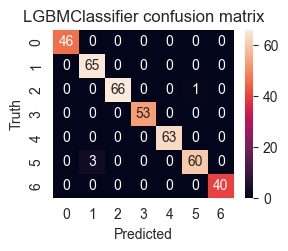

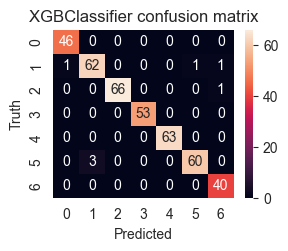

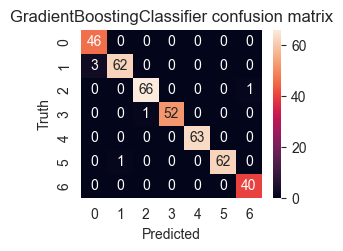

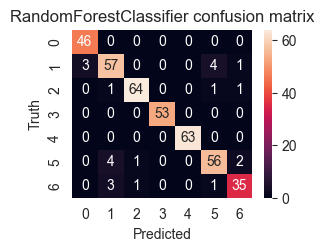

In [229]:
for i,model in enumerate(models):
    plt.subplot(2,2,i+1)
    y_predicted = model.predict(x_test)
    model_name = type(model).__name__
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f"{model_name} confusion matrix")
    plt.show()

#### - light gradient boosting is the best model acheiving 99% accuracy and an average acc of 97% in kfold cross validation
#### - xg and gradient are almost the same in accuracy (98%) and kfold validation (97%)
#### - random forest acheived the worst results with 94% acc and an average acc of (92%) in kfold cross validation and it also seemed to overfit 